# Shape from Shading

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

In [18]:
img = cv2.imread("/home/fer/git_clone/numerical-tours/matlab/toolbox_graph/mozart--.png")
img = img[:,:]
print(img.shape)

(256, 256, 3)


In [19]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

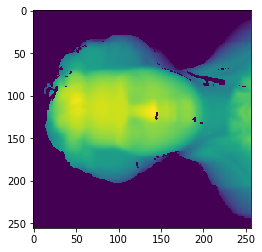

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img_gray)

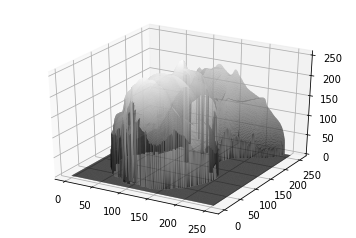

In [21]:
# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:img_gray.shape[0], 0:img_gray.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img_gray ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)


# Compute Gradient and Unnormalized gradient

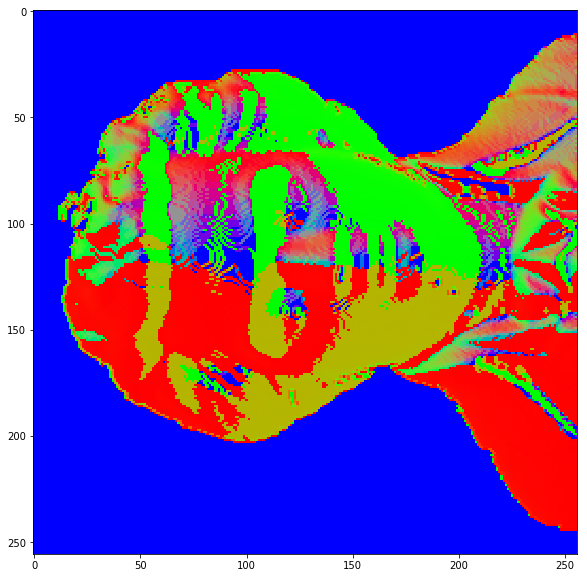

In [22]:
n0 = np.gradient(img_gray) #obtain gradients along x,y directions, as a list
n0 = np.dstack((n0[0], n0[1], np.ones_like(n0[0])))
n0_norm = np.linalg.norm(n0, axis =2, keepdims = True)
n = (n0/n0_norm)
#print(n.shape,n[150:155, 150:155,:])
#n = n0[:,:,:]/n0_norm[:,:,0]
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111)
ax2.imshow(n, cmap=plt.cm.winter)

# Relight the image


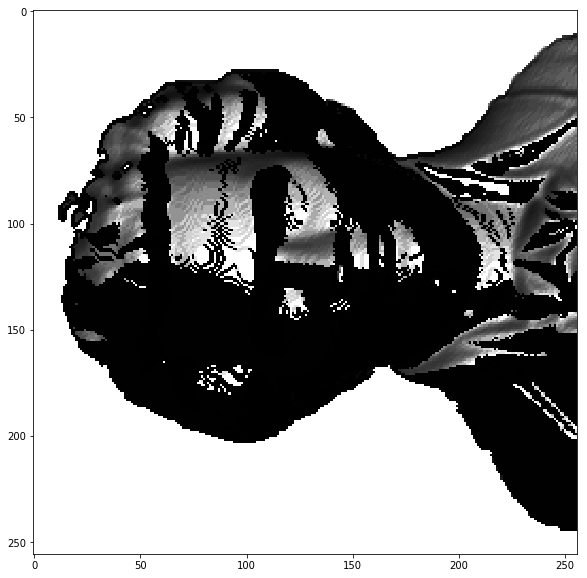

In [23]:
# New light vector
d= np.array([0.,0.,1.])

new_img = np.dot(n[:,:],d)
new_img = np.clip(new_img, 0.,1.)
fig3 = plt.figure(figsize=(10,10))
ax3 = fig3.add_subplot(111)
ax3.imshow(new_img, cmap=plt.cm.gray)